In [1]:
import fatpack
import numpy as np
import matplotlib.pyplot as plt
print(fatpack.__version__)

0.6.3


# Defining DNVGL RP-C203 endurance curves with fatpack

(This example was made for DNVGL RP-C203 - Edition April 2016, any references made in this example refers to that edition)

The endurance curves in DNV-GL RP-C203 (C203) are defined by

$\log{N} = \log{\bar{a}} - m\log{S}$

where $N$ is the number of cycles to failure and $S$ is the stress range, $m$ is the slope parameter, $\log{\bar{a}}$ is the intercept of the $\log{N}$ axis. 

C203 then gives the intercept $\log{\bar{a}}$ and the slope to define concrete endurance curves (B1, B2, ..., W3).

In other standards, such as the Eurocode (EC3-9), the endurance curves have the same underlying definition as the equation above, but instead of giving the intercept parameter $\log{\bar{a}}$ for concrete endurance curves, a characteristic stress range $S_c$ is given together with characteristic endurance $N_c$. The intercept parameter $\log{\bar{a}}$ is then given implicitly 

$\log{\bar{a}} = \log{N_c}+m\log{S_c}$

similarly, the characteristic stress range and endurance is implicitly defined by the intercept parameter by 

$\log{S_c} = \frac{\log{\bar{a}} - \log{N_c}}{m}$

and 

$\log{N_c} = \log{\bar{a}} - m\log{S_c}$

In other words, the different standards have slightly different formats when presenting the concrete endurance curves, but it is trivial to convert between the different formats given the equations above. 

The endurance curves in fatpack are defined in the way of the Eurocode, i.e. by specifying the characteristic stress range, but it is still easy to define the C203 endurance curves in fatpack. 

By setting the characteristic stress to one, i.e. $S_c=1.0 \Rightarrow \log{S_c}=\log{1.0}=0$, we find that the intercept parameter is actually the characteristic endurance and we find that

$\log{N_c} = \log{\bar{a}}$ when $S_c = 1.0$

which we may use to directly define the endurance curves given in C203.

# Example: Defining DNVGL C203 endurance curve C (in air) in fatpack

Endurance curve C is a bi-linear endurance curve with slope parameters $m_1=3.0$ and $m_2=5.0$, intercept parameters $\log{\bar{a}_1}=12.592$ and $\log{\bar{a}_2}=16.320$. The two linear curves intersect at $N_d = 10^7$. 

To define this curve in fatpack, we first define a curve with characteristic stress (detail category) `Sc=1.0` and then alter the characteristic endurance `Nc`, slopes `m1`,`m2` and then finally the intersect `Nd`, see below

In [2]:
curve = fatpack.BiLinearEnduranceCurve(1.0)
curve.Nc = 10.**12.592
curve.m1 = 3.0
curve.m2 = 5.0
curve.Nd = 1e7

We verify that this is the actual C curve in C203 by plotting the curve and also by comparing the fatigue limit given in C203 ($S(N=10^7)=73.1 MPa$) and the second intercept ($\log{N(S=1.0)}=\log{\bar{a}_2}=16.320$) to those given by the defined curve

Fatigue limit: 73
Intercept of second linear curve log a2: 16.32


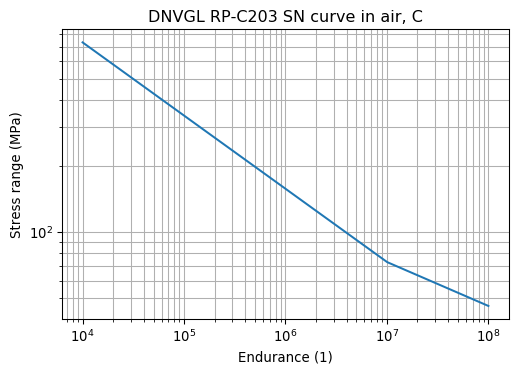

In [3]:
N = np.logspace(4, 8, 1000)
S = curve.get_stress(N)

plt.figure(dpi=96)
plt.loglog(N, S)
plt.title("DNVGL RP-C203 SN curve in air, C")
plt.xlabel("Endurance (1)")
plt.ylabel("Stress range (MPa)")
plt.grid(which='both')


fatigue_limit = curve.get_stress(10**7)
print("Fatigue limit:", fatigue_limit)

loga2 = np.log10(curve.get_endurance(1.0))
print("Intercept of second linear curve log a2:", loga2)

# Defining a DNVGL endurance curve factory class

Below we define the DNVGL endurance curves for "in air", "in seawater with cathodic protection" and "in seawater for free corrosion" and create a factory class to for easy access to the different SN curves.

In [4]:
curves_in_air = dict(
    reference = "DNVGL-RP-C203 - Edition April 2016, Table 2-1 S-N curves in air",
    B1= dict(m1=4.0, loga1=15.117, m2=5, Nd=1e7, loga2=17.146, fl=106.97),
    B2= dict(m1=4.0, loga1=14.885, m2=5, Nd=1e7, loga2=16.856, fl= 93.59),
    C = dict(m1=3.0, loga1=12.592, m2=5, Nd=1e7, loga2=16.320, fl= 73.10),
    C1= dict(m1=3.0, loga1=12.449, m2=5, Nd=1e7, loga2=16.081, fl= 65.50),
    C2= dict(m1=3.0, loga1=12.301, m2=5, Nd=1e7, loga2=15.835, fl= 58.48),
    D = dict(m1=3.0, loga1=12.164, m2=5, Nd=1e7, loga2=15.606, fl= 52.63),
    E = dict(m1=3.0, loga1=12.010, m2=5, Nd=1e7, loga2=15.350, fl= 46.78),
    F = dict(m1=3.0, loga1=11.855, m2=5, Nd=1e7, loga2=15.091, fl= 41.52),
    F1= dict(m1=3.0, loga1=11.699, m2=5, Nd=1e7, loga2=14.832, fl= 36.84),
    F3= dict(m1=3.0, loga1=11.546, m2=5, Nd=1e7, loga2=14.576, fl= 32.75),
    G = dict(m1=3.0, loga1=11.398, m2=5, Nd=1e7, loga2=14.330, fl= 29.24),
    W1= dict(m1=3.0, loga1=11.261, m2=5, Nd=1e7, loga2=14.101, fl= 26.32),
    W2= dict(m1=3.0, loga1=11.107, m2=5, Nd=1e7, loga2=13.845, fl= 23.39),
    W3= dict(m1=3.0, loga1=10.970, m2=5, Nd=1e7, loga2=13.617, fl= 21.05),
)

curves_in_seawater_with_cathodic_protection = dict(
    reference = "DNVGL-RP-C203 - Edition April 2016, Table 2-2 S-N curves in air",
    B1= dict(m1=4.0, loga1=14.917, m2=5, Nd=1e6, loga2=17.146, fl=106.97),
    B2= dict(m1=4.0, loga1=14.685, m2=5, Nd=1e6, loga2=16.856, fl= 93.59),
    C = dict(m1=3.0, loga1=12.192, m2=5, Nd=1e6, loga2=16.320, fl= 73.10),
    C1= dict(m1=3.0, loga1=12.049, m2=5, Nd=1e6, loga2=16.081, fl= 65.50),
    C2= dict(m1=3.0, loga1=11.901, m2=5, Nd=1e6, loga2=15.835, fl= 58.48),
    D = dict(m1=3.0, loga1=11.764, m2=5, Nd=1e6, loga2=15.606, fl= 52.63),
    E = dict(m1=3.0, loga1=11.610, m2=5, Nd=1e6, loga2=15.350, fl= 46.78),
    F = dict(m1=3.0, loga1=11.455, m2=5, Nd=1e6, loga2=15.091, fl= 41.52),
    F1= dict(m1=3.0, loga1=11.299, m2=5, Nd=1e6, loga2=14.832, fl= 36.84),
    F3= dict(m1=3.0, loga1=11.146, m2=5, Nd=1e6, loga2=14.576, fl= 32.75),
    G = dict(m1=3.0, loga1=10.998, m2=5, Nd=1e6, loga2=14.330, fl= 29.24),
    W1= dict(m1=3.0, loga1=10.861, m2=5, Nd=1e6, loga2=14.101, fl= 26.32),
    W2= dict(m1=3.0, loga1=10.707, m2=5, Nd=1e6, loga2=13.845, fl= 23.39),
    W3= dict(m1=3.0, loga1=10.570, m2=5, Nd=1e6, loga2=13.617, fl= 21.05),
)

curves_in_seawater_for_free_corrosion = dict(
    reference = "DNVGL-RP-C203 - Edition April 2016, Table 2-4 S-N curves in air",
    B1= dict(m=3.0, loga=12.436),
    B2= dict(m=3.0, loga=12.262),
    C = dict(m=3.0, loga=12.115),
    C1= dict(m=3.0, loga=11.972),
    C2= dict(m=3.0, loga=11.824),
    D = dict(m=3.0, loga=11.687),
    E = dict(m=3.0, loga=11.533),
    F = dict(m=3.0, loga=11.378),
    F1= dict(m=3.0, loga=11.222),
    F3= dict(m=3.0, loga=11.068),
    G = dict(m=3.0, loga=10.921),
    W1= dict(m=3.0, loga=10.784),
    W2= dict(m=3.0, loga=10.630),
    W3= dict(m=3.0, loga=10.493),
)


class DNVGL_EnduranceCurve:
    """Return a DNVGL C203 endurance curve.
    
    Use the following methods to access endurance curves 
    for different structural types and in different environments
        - DNVGL_EnduranceCurve.in_air
        - DNVGL_EnduranceCurve.in_seawater_with_cathodic_protection
        - DNVGL_EnduranceCurve.in_seawater_for_free_corrosion
        
    """
    names = [c for c in curves_in_air.keys() if c != "reference"]
    @staticmethod
    def in_air(name):
        """Returns a DNVGL endurance curve (SN curve)
        
        This method returns an endurance curve in air according to 
        table 2-1 in DNVGL RP-C203.
        
        Arguments
        ---------
        name : str
            Name of the endurance curve.
            
        Returns
        -------
        fatpack.BiLinearEnduranceCurve
            Endurance curve corresponding to `name` in DNVGL RP-C203
            
        Example
        -------
        >>>curve = DNVGL_EnduranceCurve.in_air("D")
        >>>N = curve.get_endurance(90.0)
        
        """
        
        data = curves_in_air[name]
        curve = fatpack.BiLinearEnduranceCurve(1.0)
        curve.Nc = 10 ** data["loga1"]
        curve.Nd = data["Nd"]
        curve.m1 = data["m1"]
        curve.m2 = data["m2"]
        curve.reference = curves_in_air["reference"]
        return curve
    
    @staticmethod
    def in_seawater_with_cathodic_protection(name):
        """Returns a DNVGL endurance curve (SN curve)
        
        This method returns an endurance curve in seawater with 
        cathodic protection according to table 2-2 in DNVGL RP-C203.
        
        Arguments
        ---------
        name : str
            Name of the endurance curve.
            
        Returns
        -------
        fatpack.BiLinearEnduranceCurve
            Endurance curve corresponding to `name` in DNVGL RP-C203
            
        Example
        -------
        >>>curve = DNVGL_EnduranceCurve.in_seawater_with_cathodic_protection("D")
        >>>N = curve.get_endurance(90.0)
        
        """
        data = curves_in_seawater_with_cathodic_protection[name]
        curve = fatpack.BiLinearEnduranceCurve(1.0)
        curve.Nc = 10 ** data["loga1"]
        curve.Nd = data["Nd"]
        curve.m1 = data["m1"]
        curve.m2 = data["m2"]
        ref = curves_in_seawater_with_cathodic_protection["reference"]
        curve.reference = ref
        return curve
    
    @staticmethod
    def in_seawater_for_free_corrosion(name):
        """Returns a DNVGL endurance curve (SN curve)
        
        This method returns an endurance curve in seawater for 
        free corrosion according to table 2-4 in DNVGL RP-C203.
        
        Arguments
        ---------
        name : str
            Name of the endurance curve.
            
        Returns
        -------
        fatpack.LinearEnduranceCurve
            Endurance curve corresponding to `name` in DNVGL RP-C203
            
        Example
        -------
        >>>curve = DNVGL_EnduranceCurve.in_seawater_for_free_corrosion("D")
        >>>N = curve.get_endurance(90.0)
        
        """
        data = curves_in_seawater_for_free_corrosion[name]
        curve = fatpack.LinearEnduranceCurve(1.0)
        curve.Nc = 10 ** data["loga"]
        curve.m = data["m"]
        ref = curves_in_seawater_for_free_corrosion["reference"]
        curve.reference = ref
        return curve    

Below we plot the curves and compare the fatigue limit (fl) given in C203 to the fatigue limit determined by the defined curves in fatpack. 

Curve   |  Est. fl |  True fl | Fl error
B1      |   106.97 |   106.97 |    0.00%
B2      |    93.59 |    93.59 |    0.00%
C       |    73.11 |    73.10 |    0.01%
C1      |    65.51 |    65.50 |    0.02%
C2      |    58.48 |    58.48 |    0.00%
D       |    52.64 |    52.63 |    0.02%
E       |    46.77 |    46.78 |   -0.02%
F       |    41.53 |    41.52 |    0.02%
F1      |    36.84 |    36.84 |    0.00%
F3      |    32.76 |    32.75 |    0.03%
G       |    29.24 |    29.24 |    0.00%
W1      |    26.32 |    26.32 |    0.00%
W2      |    23.39 |    23.39 |    0.00%
W3      |    21.05 |    21.05 |    0.00%


(10000.0, 100000000.0)

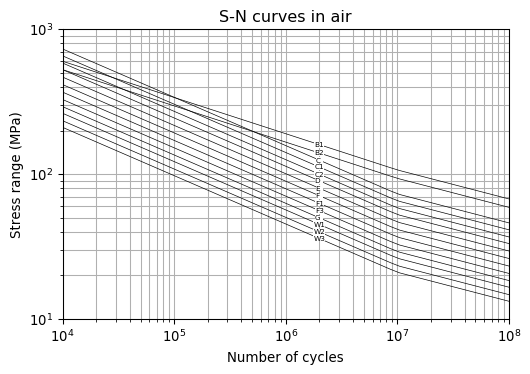

In [5]:
fig = plt.figure(dpi=96, figsize=(6, 4))

N = np.logspace(4, 8)
print("{0:<7} | {1:>8} | {2:>8} | {3:>8}".format("Curve", "Est. fl", "True fl", "Fl error"))
for name in DNVGL_EnduranceCurve.names:
    curve = DNVGL_EnduranceCurve.in_air(name)
    data = curves_in_air[name]
    fl = np.round(curve.get_stress(1e7), 2)
    fl_data = data["fl"]
    err = (fl-fl_data)/fl_data
    np.testing.assert_almost_equal(fl, fl_data, decimal=2)
    print(f"{name:<7} | {fl:8.2f} | {fl_data:8.2f} | {err:8.2%}")
    S = curve.get_stress(N)
    plt.loglog(N, S, "k", lw=.5)
    plt.text(2e6, curve.get_stress(2e6), "{0:2s}".format(name), fontsize=5.5, 
             ha='center', va='center', bbox={'fc':'w', 'ec':(0, 0, 0, 0), 'pad':0})
plt.grid(which='both')
plt.title("S-N curves in air")
plt.xlabel("Number of cycles")
plt.ylabel("Stress range (MPa)")
plt.ylim(10, 1000)
plt.xlim(1e4, 1e8)

Curve   |  Est. fl |  True fl | Fl error
B1      |   106.97 |   106.97 |    0.00%
B2      |    93.59 |    93.59 |    0.00%
C       |    73.11 |    73.10 |    0.01%
C1      |    65.51 |    65.50 |    0.02%
C2      |    58.48 |    58.48 |    0.00%
D       |    52.64 |    52.63 |    0.02%
E       |    46.77 |    46.78 |   -0.02%
F       |    41.53 |    41.52 |    0.02%
F1      |    36.84 |    36.84 |    0.00%
F3      |    32.76 |    32.75 |    0.03%
G       |    29.24 |    29.24 |    0.00%
W1      |    26.32 |    26.32 |    0.00%
W2      |    23.39 |    23.39 |    0.00%
W3      |    21.05 |    21.05 |    0.00%


(10000.0, 100000000.0)

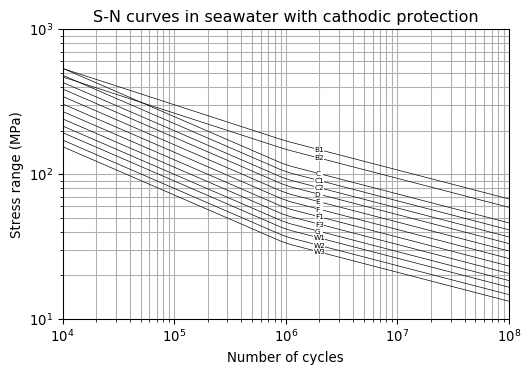

In [6]:
fig = plt.figure(dpi=96, figsize=(6, 4))

N = np.logspace(4, 8)
print("{0:<7} | {1:>8} | {2:>8} | {3:>8}".format("Curve", "Est. fl", "True fl", "Fl error"))
for name in DNVGL_EnduranceCurve.names:
    curve = DNVGL_EnduranceCurve.in_seawater_with_cathodic_protection(name)
    data = curves_in_seawater_with_cathodic_protection[name]
    fl = np.round(curve.get_stress(1e7), 2)
    fl_data = data["fl"]
    err = (fl-fl_data)/fl_data
    np.testing.assert_almost_equal(fl, fl_data, decimal=2)
    print(f"{name:<7} | {fl:8.2f} | {fl_data:8.2f} | {err:8.2%}")
    S = curve.get_stress(N)
    plt.loglog(N, S, "k", lw=.5)
    plt.text(2e6, curve.get_stress(2e6), "{0:2s}".format(name), fontsize=5.5, 
             ha='center', va='center', bbox={'fc':'w', 'ec':(0, 0, 0, 0), 'pad':0})
plt.grid(which='both')
plt.title("S-N curves in seawater with cathodic protection")
plt.xlabel("Number of cycles")
plt.ylabel("Stress range (MPa)")
plt.ylim(10, 1000)
plt.xlim(1e4, 1e8)

(10000.0, 100000000.0)

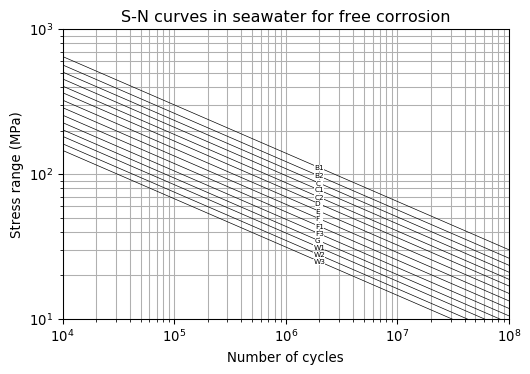

In [7]:
fig = plt.figure(dpi=96, figsize=(6, 4))

N = np.logspace(4, 8)
for name in DNVGL_EnduranceCurve.names:
    curve = DNVGL_EnduranceCurve.in_seawater_for_free_corrosion(name)
    data = curves_in_seawater_for_free_corrosion[name]
    S = curve.get_stress(N)
    plt.loglog(N, S, "k", lw=.5)
    plt.text(2e6, curve.get_stress(2e6), "{0:2s}".format(name), fontsize=5.5, 
             ha='center', va='center', bbox={'fc':'w', 'ec':(0, 0, 0, 0), 'pad':0})
plt.grid(which='both')
plt.title("S-N curves in seawater for free corrosion")
plt.xlabel("Number of cycles")
plt.ylabel("Stress range (MPa)")
plt.ylim(10, 1000)
plt.xlim(1e4, 1e8)